In [4]:
import numpy as np
import matplotlib.pyplot as plt
from os import listdir
from os.path import isfile, join

In [14]:
path="./experiment_3/"
fichiers = [f for f in listdir(path) if isfile(join(path, f))]
print(np.sort(fichiers))

['N_sample1000_N10000_p0.1.npy' 'N_sample1000_N10000_p0.2.npy'
 'N_sample1000_N10000_p0.3.npy' 'N_sample1000_N10000_p0.4.npy'
 'N_sample1000_N10000_p0.5.npy' 'N_sample1000_N10000_p0.6.npy'
 'N_sample1000_N10000_p0.7.npy' 'N_sample1000_N10000_p0.8.npy'
 'N_sample1000_N10000_p0.9.npy' 'N_sample1000_N1000_p0.1.npy'
 'N_sample1000_N1000_p0.2.npy' 'N_sample1000_N1000_p0.3.npy'
 'N_sample1000_N1000_p0.4.npy' 'N_sample1000_N1000_p0.5.npy'
 'N_sample1000_N1000_p0.6.npy' 'N_sample1000_N1000_p0.7.npy'
 'N_sample1000_N1000_p0.8.npy' 'N_sample1000_N1000_p0.9.npy'
 'N_sample1000_N100_p0.1.npy' 'N_sample1000_N100_p0.2.npy'
 'N_sample1000_N100_p0.3.npy' 'N_sample1000_N100_p0.4.npy'
 'N_sample1000_N100_p0.5.npy' 'N_sample1000_N100_p0.6.npy'
 'N_sample1000_N100_p0.7.npy' 'N_sample1000_N100_p0.8.npy'
 'N_sample1000_N100_p0.9.npy' 'N_sample1000_N2000_p0.1.npy'
 'N_sample1000_N2000_p0.2.npy' 'N_sample1000_N2000_p0.3.npy'
 'N_sample1000_N2000_p0.4.npy' 'N_sample1000_N2000_p0.5.npy'
 'N_sample1000_N2000_p0.

In [19]:
N_sample=1000
data =[]
Ns = [100,200,300,400,500,1000,2000,5000,10000]
ps = [.1,.2,.3,.4,.5,.6,.7,.8,.9]
for N in Ns:
    temp = []
    for p in ps :
        file =f"N_sample{N_sample}_N{N}_p{p}.npy"
        temp.append(np.load(path+file))
    data.append(temp)   
data = np.array(data)
print(data.shape)

(9, 9, 1000, 2)


(9, 9, 2)


(array([[658.,   0.,   0.,   0.,   0., 287.,   0.,   0.,   0.,  55.],
        [855.,   0.,   0.,   0.,   0., 134.,   0.,   0.,   0.,  11.]]),
 array([0.00000000e+00, 3.08404009e-05, 6.16808019e-05, 9.25212028e-05,
        1.23361604e-04, 1.54202005e-04, 1.85042406e-04, 2.15882806e-04,
        2.46723207e-04, 2.77563608e-04, 3.08404009e-04]),
 <a list of 2 BarContainer objects>)

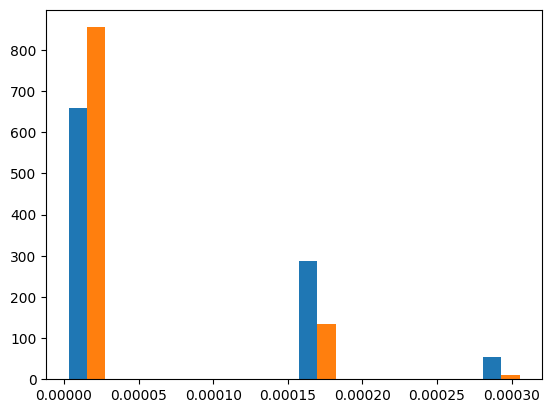

In [33]:
data_m=data.mean(axis=2)
print(data_m.shape)
plt.hist((data[8,0,:]))

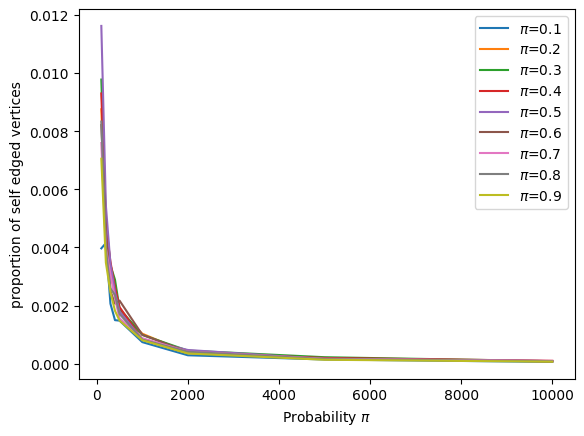

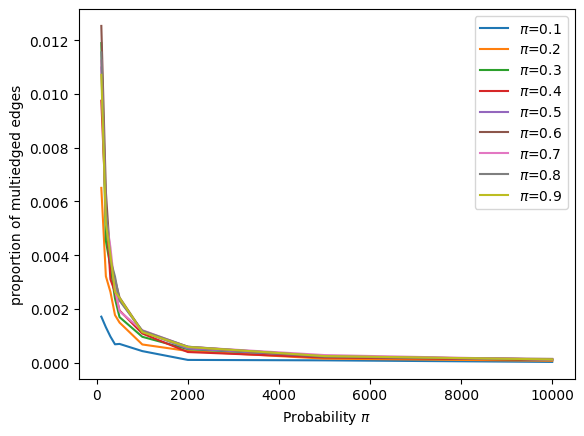

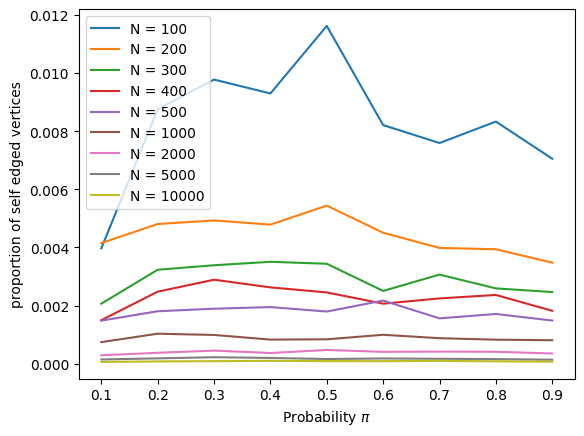

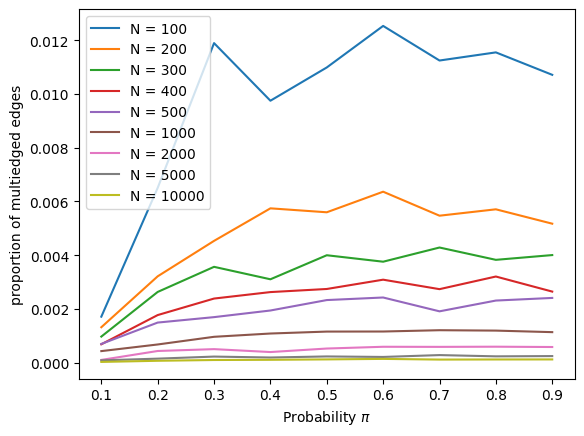

In [36]:
for i in range(9):
    plt.plot(Ns,data_m[:,i,0],label=r"$\pi$="+str(ps[i]))
    plt.xlabel(r"Probability $\pi$")
    plt.ylabel("proportion of self edged vertices")
    plt.legend()
plt.show()
for i in range(9):
    plt.plot(Ns,data_m[:,i,1],label=r"$\pi$="+str(ps[i]))
    plt.xlabel(r"Probability $\pi$")
    plt.ylabel("proportion of multiedged edges")
    plt.legend()
plt.show()

for i in range(9):
    plt.plot(ps,data_m[i,:,0],label="N = "+str(Ns[i]))
    plt.xlabel(r"Probability $\pi$")
    plt.ylabel("proportion of self edged vertices")
    plt.legend()
plt.show()
for i in range(9):
    plt.plot(ps,data_m[i,:,1],label="N = "+str(Ns[i]))
    plt.xlabel(r"Probability $\pi$")
    plt.ylabel("proportion of multiedged edges")
    plt.legend()
plt.show()